## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

## Loading The Dataset

In [15]:
# reading the dataset using read_csv
df = pd.read_csv("stock_data.csv", 
                 parse_dates=True, 
                 index_col="Date")

# Now 'Date' will be your datetime index format
df.index = pd.to_datetime(df.index)

# displaying the first five rows of dataset
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


## Dropping Unwanted Columns  

In [16]:
# deleting column
df.drop(columns=['Unnamed: 0','Name'], inplace =True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729
2006-01-04,41.22,41.90,40.77,40.97,20553479
2006-01-05,40.93,41.73,40.85,41.53,12829610
2006-01-06,42.88,43.57,42.80,43.21,29422828
2006-01-09,43.10,43.66,42.82,43.42,16268338


## Plotting Line plot for Time Series data

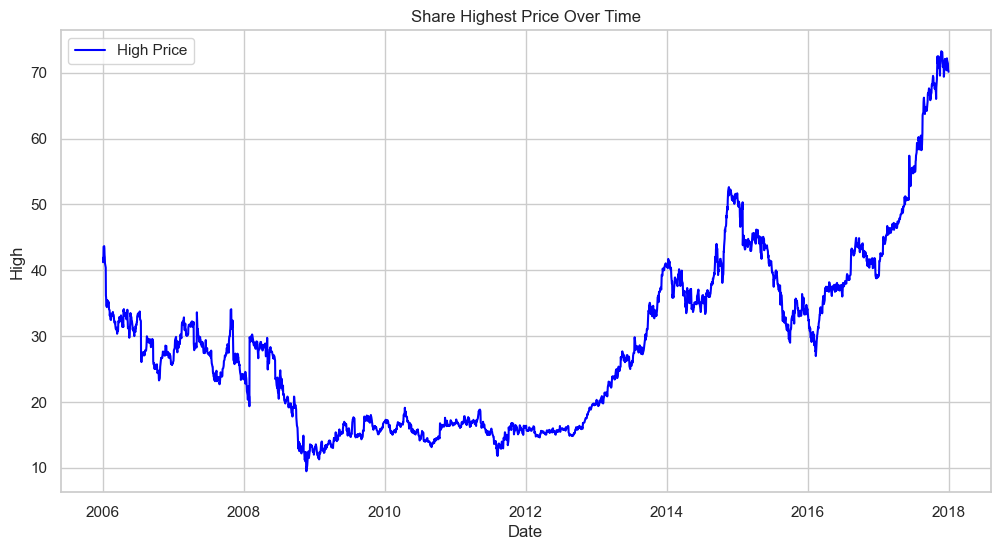

In [4]:
sns.set(style="whitegrid")  
 
plt.figure(figsize=(12, 6))  
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')
 
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')
 
plt.show()

## Resampling

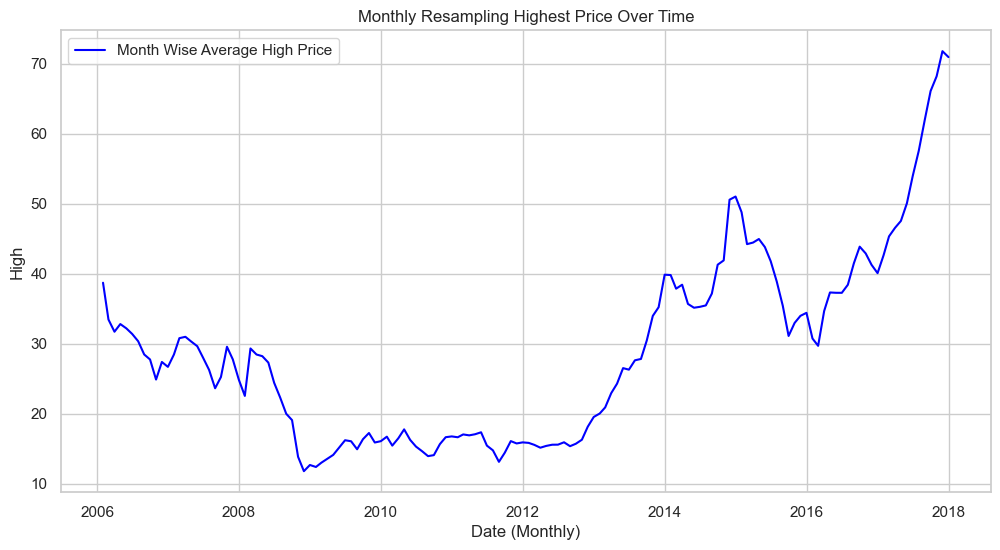

In [6]:
# Resampling to monthly frequency, using mean as an aggregation function
df_resampled = df.resample('M').mean()  
 
sns.set(style="whitegrid")  
 
# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')
 
# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')
 
plt.show()

<b>`Observation`
- We have observed an upward trend in the resampled monthly volume data. An upward trend indicates that, over the monthly intervals, the “high” column tends to increase over time.

## Detecting Seasonality Using Auto Correlation

<Figure size 1200x600 with 0 Axes>

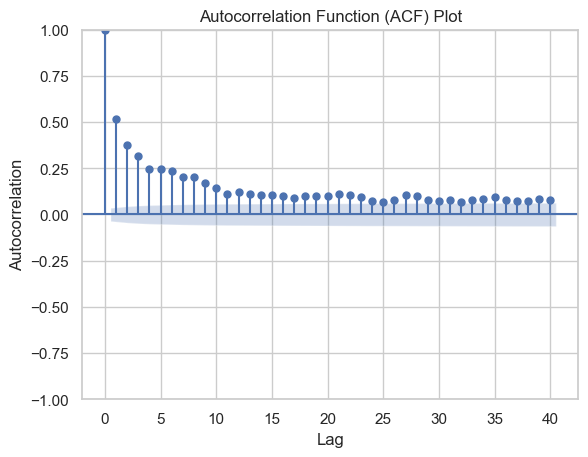

In [7]:
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40)  # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

- The presence of seasonality is typically indicated by peaks or spikes at regular intervals, as there are none there is no seasonality in our data.

## Detecting Stationarity

In [8]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming df is your DataFrame
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.7671404880535929
p-value: 0.9910868050318213
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


## Smoothening the data using Differencing and Moving Average

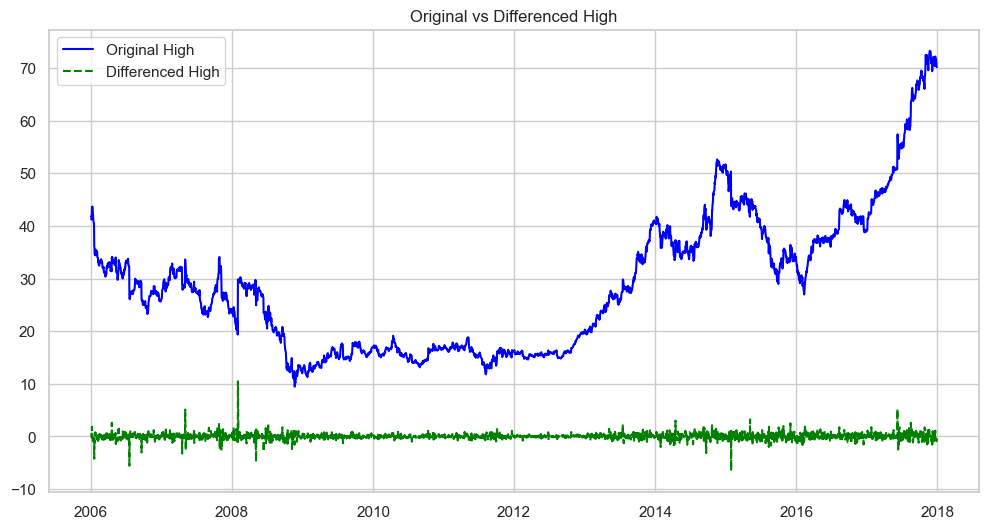

In [9]:
# Differencing
df['high_diff'] = df['High'].diff()
 
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

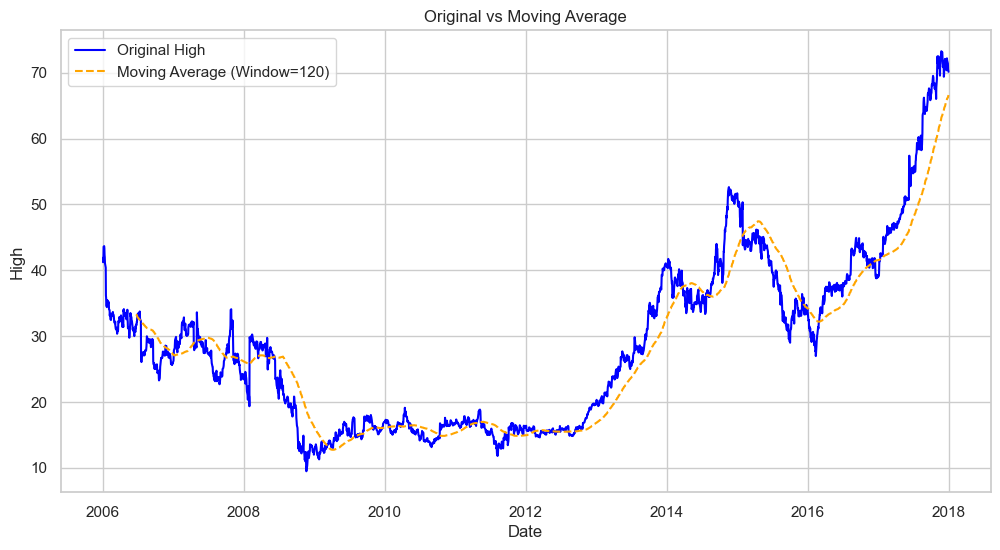

In [10]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()
 
# Plotting
plt.figure(figsize=(12, 6))
 
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')
 
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()

## Original Data Vs Differenced Data

In [11]:
df['high_diff'] = df['High'].diff()

In [12]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)
 
# Display the combined DataFrame
print(df_combined.head())

             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


In [13]:
# Remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: high_diff, dtype: float64

In [14]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -12.14836747834325
p-value: 1.5912766134148354e-22
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


- Based on the ADF Statistici.e < all Critical Values, So, we reject the null hypothesis and conclude that we have enough evidence to reject the null hypothesis. The data appear to be stationary according to the Augmented Dickey-Fuller test.
- This suggests that differencing or other transformations may be needed to achieve stationarity before applying certain time series models.